## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Nov 09 15:52:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.43       Driver Version: 456.43       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106... WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   44C    P8     8W / 180W |    698MiB /  6144MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import os
import keras
import tensorflow as tf
from time import time
from tensorflow.keras.layers import Activation, Dense, Input 
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    x = x/255
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape[1:]

(3072,)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10):
    input_layer = Input(input_shape)
    
    x = Dense(units=512, activation="relu")(input_layer)
    x = Dense(units=512, activation="relu")(x)
    x = Dense(units=256, activation="relu")(x)
    x = Dense(units=256, activation="relu")(x)
    x = Dense(units=128, activation="relu")(x)
    x = Dense(units=64, activation="relu")(x)
    x = Dense(units=64, activation="relu")(x)
    out = Dense(units=output_units, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer =tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

CPU

In [70]:
t0 = time()

model.fit(x_train, y_train, 
          epochs=EPOCHS, batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

print(time()-t0)

Epoch 1/100
196/196 [==============================] - 3s 16ms/step - loss: 1.9989 - accuracy: 0.2505 - val_loss: 1.8429 - val_accuracy: 0.3265
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 1.7628 - accuracy: 0.3587 - val_loss: 1.7103 - val_accuracy: 0.3834
Epoch 3/100
196/196 [==============================] - 3s 15ms/step - loss: 1.6788 - accuracy: 0.3948 - val_loss: 1.7446 - val_accuracy: 0.3762
Epoch 4/100
196/196 [==============================] - 3s 15ms/step - loss: 1.6193 - accuracy: 0.4176 - val_loss: 1.5882 - val_accuracy: 0.4320
Epoch 5/100
196/196 [==============================] - 3s 16ms/step - loss: 1.5673 - accuracy: 0.4370 - val_loss: 1.5345 - val_accuracy: 0.4465
Epoch 6/100
196/196 [==============================] - 3s 16ms/step - loss: 1.5251 - accuracy: 0.4527 - val_loss: 1.5559 - val_accuracy: 0.4437
Epoch 7/100
196/196 [==============================] - 3s 16ms/step - loss: 1.4788 - accuracy: 0.4704 - val_loss: 1.5258 - val_accuracy:

GPU

In [10]:
t0 = time()

model.fit(x_train, y_train, 
          epochs=EPOCHS, batch_size=BATCH_SIZE,
          validation_data=(x_test, y_test),
          shuffle=True)

print(time()-t0)

Epoch 1/100
196/196 [==============================] - 3s 16ms/step - loss: 1.9567 - accuracy: 0.2792 - val_loss: 1.8069 - val_accuracy: 0.3449
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 1.7644 - accuracy: 0.3617 - val_loss: 1.6965 - val_accuracy: 0.3873
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 1.6715 - accuracy: 0.3962 - val_loss: 1.6442 - val_accuracy: 0.3964
Epoch 4/100
196/196 [==============================] - 3s 16ms/step - loss: 1.5926 - accuracy: 0.4293 - val_loss: 1.5915 - val_accuracy: 0.4299
Epoch 5/100
196/196 [==============================] - 3s 16ms/step - loss: 1.5436 - accuracy: 0.4466 - val_loss: 1.5347 - val_accuracy: 0.4528
Epoch 6/100
196/196 [==============================] - 3s 16ms/step - loss: 1.5026 - accuracy: 0.4599 - val_loss: 1.5102 - val_accuracy: 0.4599
Epoch 7/100
196/196 [==============================] - 3s 15ms/step - loss: 1.4657 - accuracy: 0.4751 - val_loss: 1.4980 - val_accuracy:

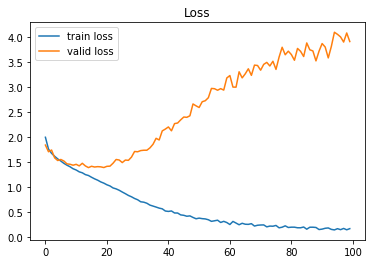

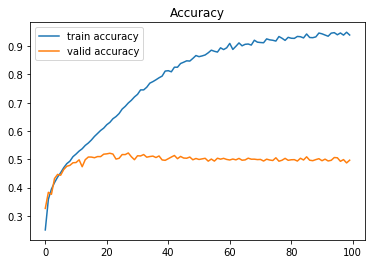

In [72]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()